In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_dataset(file_path):
    """Load dataset from a CSV file."""
    return pd.read_csv(file_path)

In [3]:
def preprocess_data(df):
    """Preprocess the data by vectorizing the text descriptions."""
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df["Deskripsi"])
    y = df["Kelas"]
    return X, y, vectorizer

In [4]:
def split_data(X, y, test_size=0.2, random_state=42):
    """Split the data into training and testing sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [5]:
def train_knn_model(X_train, y_train, n_neighbors=3):
    """Train a K-Nearest Neighbors (KNN) model."""
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    return knn_model

In [6]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the model and display metrics."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return y_pred

In [7]:
def plot_confusion_matrix(y_test, y_pred, classes):
    """Plot the confusion matrix."""
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [8]:
def plot_accuracy(accuracy):
    """Plot the accuracy of the model."""
    plt.bar(["Accuracy"], [accuracy / 100], color='skyblue')
    plt.ylim(0, 1)
    plt.title("Akurasi Model KNN")
    plt.ylabel("Akurasi")
    plt.show()

In [9]:
def test_input_manual(model, vectorizer, deskripsi_input):
    """Test a new input manually."""
    input_vectorized = vectorizer.transform([deskripsi_input])
    hasil_prediksi = model.predict(input_vectorized)
    return hasil_prediksi[0]

Accuracy: 83.33%

Classification Report:
                        precision    recall  f1-score   support

      Butuh Penyiraman       0.67      1.00      0.80         2
Tidak Butuh Penyiraman       1.00      0.75      0.86         4

              accuracy                           0.83         6
             macro avg       0.83      0.88      0.83         6
          weighted avg       0.89      0.83      0.84         6



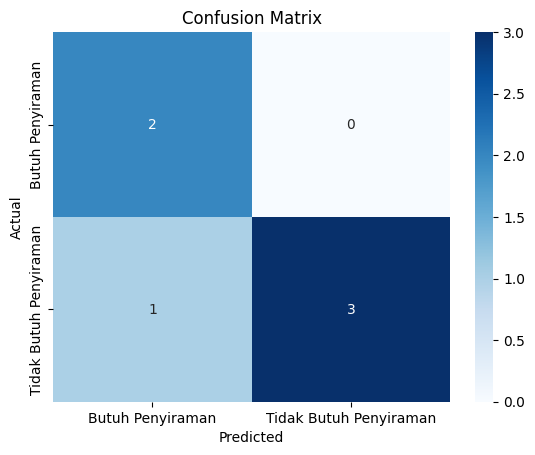

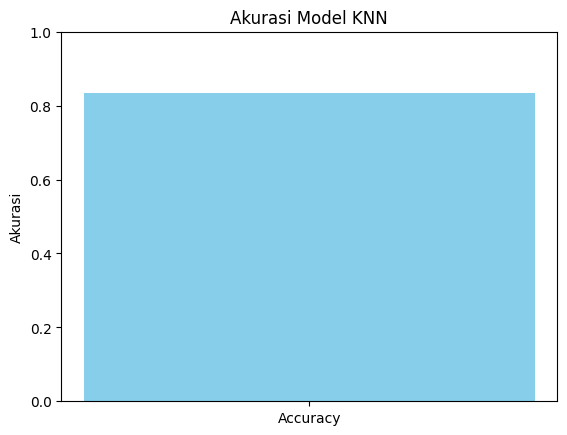

Input: Tanah kering, daun segar, cuaca hujan
Hasil Prediksi: Tidak Butuh Penyiraman


In [12]:
def main():
    # Load dataset
    data_path = "dataset.csv"
    df = load_dataset(data_path)

    # Preprocess data
    X, y, vectorizer = preprocess_data(df)

    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train model
    knn_model = train_knn_model(X_train, y_train)

    # Evaluate model
    y_pred = evaluate_model(knn_model, X_test, y_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, knn_model.classes_)

    # Plot accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    plot_accuracy(accuracy)

    # Test input manually
    input_baru = "Tanah kering, daun segar, cuaca hujan"
    hasil = test_input_manual(knn_model, vectorizer, input_baru)
    print(f"Input: {input_baru}")
    print(f"Hasil Prediksi: {hasil}")

if __name__ == "__main__":
    main()